In [18]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from skimage.feature import local_binary_pattern

In [19]:
def load_images_from_folder(folder, num_images=5):
    """Load a limited number of images from the folder and preprocess them."""
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if i >= num_images:
            break
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = preprocess_image(img)
            images.append(img)
    return images

In [20]:
def preprocess_image(img):
    """Resize image."""
    resized_img = cv2.resize(img, (512, 512))  # Resize to uniform size
    return resized_img

In [21]:
def extract_keypoints(image):
    """Extract keypoints using the ORB algorithm directly on the color image."""
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    return image_with_keypoints, len(keypoints)

In [22]:
def extract_lines(image):
    """Extract lines using the Hough Line Transform on the combined edges of color channels."""
    edges_combined = np.zeros(image.shape[:2], dtype=np.uint8)
    for c in range(3):  # Combine edges from all three color channels
        edges = cv2.Canny(image[:,:,c], 50, 150)
        edges_combined = cv2.bitwise_or(edges_combined, edges)

    lines = cv2.HoughLinesP(edges_combined, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
    line_image = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return line_image

In [23]:
def extract_edges(image):
    """Apply Canny edge detection directly on color channels and combine them."""
    edges_combined = np.zeros(image.shape[:2], dtype=np.uint8)
    for c in range(3):
        edges = cv2.Canny(image[:,:,c], 100, 200)
        edges_combined = cv2.bitwise_or(edges_combined, edges)
    return edges_combined


In [24]:
def main():
    folder_path = r'C:\Users\sanja\OneDrive\Documents\Opencv\img_data'  
    images = load_images_from_folder(folder_path, num_images=5)

    for i, image in enumerate(images):
        keypoints_img, num_keypoints = extract_keypoints(image)
        lines_img = extract_lines(image)
        edges = extract_edges(image)

        print(f"Image {i+1} Number of keypoints: {num_keypoints}")

        plt.figure(figsize=(12, 8))
        plt.subplot(131)
        plt.imshow(cv2.cvtColor(keypoints_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i+1} Keypoints')

        plt.subplot(132)
        plt.imshow(cv2.cvtColor(lines_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i+1} Lines')

        plt.subplot(133)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Image {i+1} Edges')
        plt.show()

Image 1 Number of keypoints: 443


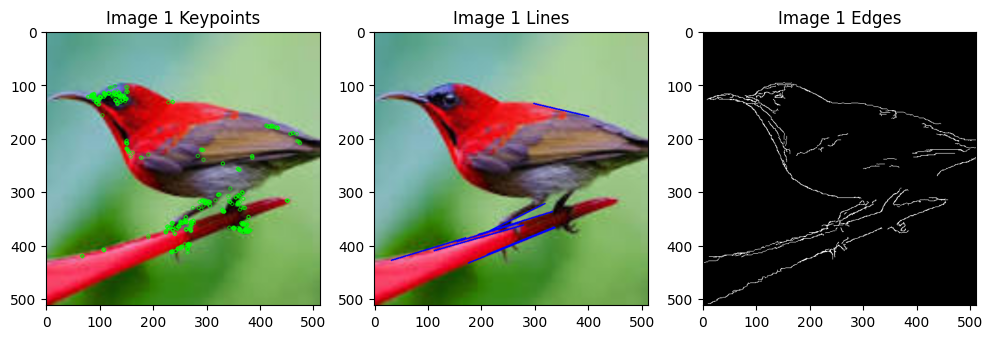

Image 2 Number of keypoints: 500


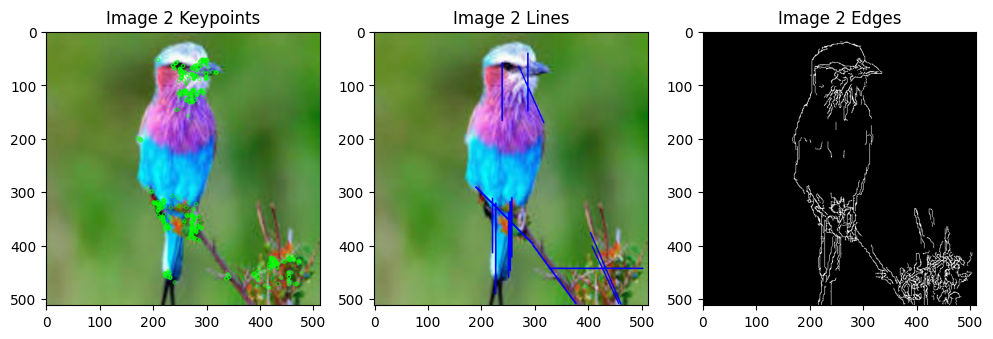

Image 3 Number of keypoints: 500


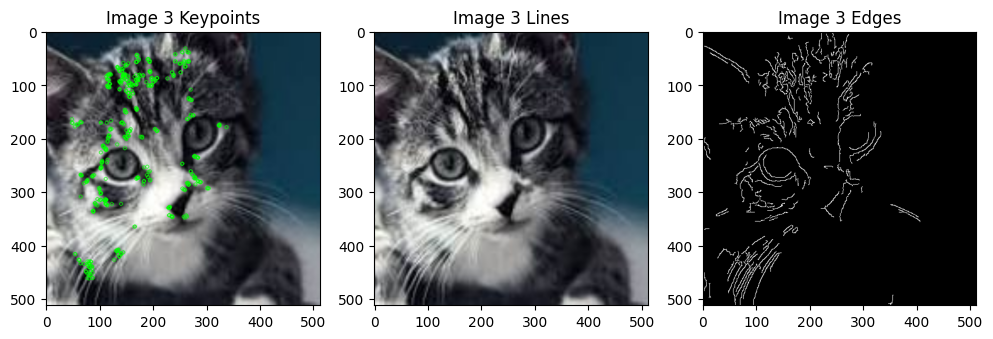

Image 4 Number of keypoints: 500


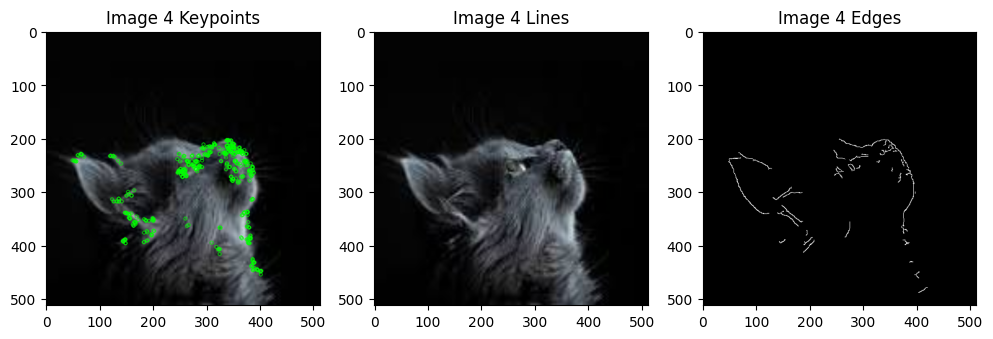

Image 5 Number of keypoints: 500


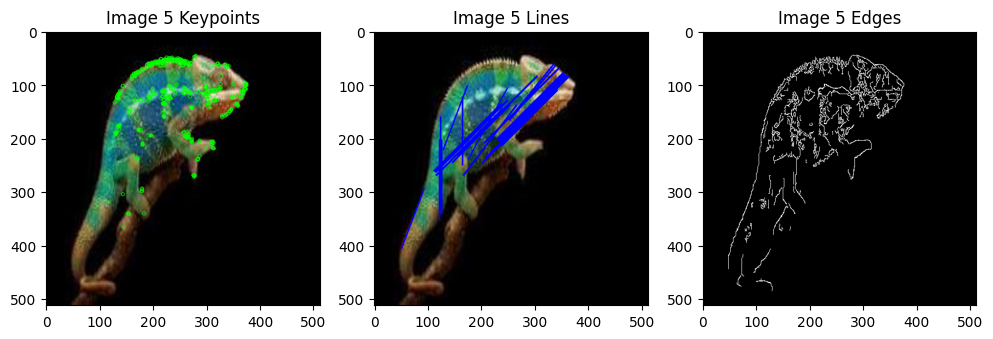

In [25]:
if __name__ == "__main__":
    main()